In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from engine import Value
from nn import Neuron, Layer, MLP

In [3]:
np.random.seed(1337)
random.seed(1337)

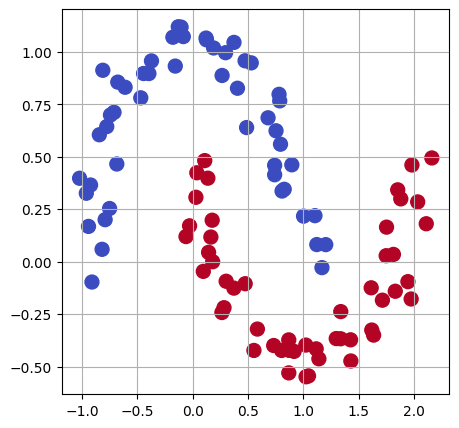

In [4]:
# create a dataset
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1  # convert to -1, 1
plt.figure(figsize=(5,5))
plt.grid()
plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap="coolwarm")

In [5]:
# initialise a model
model = MLP(2, [16, 16, 1]) # 2 layers of 16 neurons each and one output layer
print(model)
print(f"Number of parameters in the model: {len(model.parameters())}")

MLP of [Layer of [ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2),Layer of [ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16),Layer of [ReLU Neuron(16)]
Number of parameters in the model: 337


In [6]:
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(Data=1.0103836559742638) 0.5


In [7]:
# optimization
for k in range(100):
    
    # forward
    total_loss, acc = loss()

    if acc >= 1.0:
        print(f"reached {acc*100}% accuracy so stopping at step {k}")
        break
    else:
    
        # backward
        model.zero_grad()
        total_loss.backward()
        
        # update (sgd)
        learning_rate = 1.0 - 0.9*k/100
        for p in model.parameters():
            p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 1.0103836559742638, accuracy 50.0%
step 1 loss 1.0103795029272205, accuracy 50.0%
step 2 loss 1.0103753889000007, accuracy 50.0%
step 3 loss 1.0103713138474502, accuracy 50.0%
step 4 loss 1.0103672777248536, accuracy 50.0%
step 5 loss 1.0103632804879337, accuracy 50.0%
step 6 loss 1.0103593220928502, accuracy 50.0%
step 7 loss 1.0103554024961992, accuracy 50.0%
step 8 loss 1.0103515216550125, accuracy 50.0%
step 9 loss 1.0103476795267567, accuracy 50.0%
step 10 loss 1.0103438760693326, accuracy 50.0%
step 11 loss 1.010340111241074, accuracy 50.0%
step 12 loss 1.0103363850007472, accuracy 50.0%
step 13 loss 1.0103326973075504, accuracy 50.0%
step 14 loss 1.010329048121113, accuracy 50.0%
step 15 loss 1.0103254374014943, accuracy 50.0%
step 16 loss 1.0103218651091834, accuracy 50.0%
step 17 loss 1.010318331205098, accuracy 50.0%
step 18 loss 1.0103148356505844, accuracy 50.0%
step 19 loss 1.0103113784074156, accuracy 50.0%
step 20 loss 1.0103079594377917, accuracy 50.0%
step 

In [14]:
# final parameters
print("Final model parameters:")
for param in model.parameters():
    print(param.label)

Final model parameters:



















































































































































































































































































































































(-1.548639298268643, 1.951360701731357)

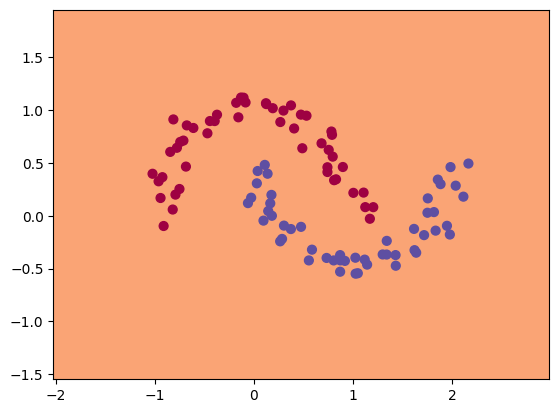

In [8]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())